In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [ ]:
import pandas as pd
import seaborn as sns

In [28]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
X = iris.iloc[:,:-1].values
y = iris.iloc[:,4].values
X.shape, y.shape

((150, 4), (150,))

## Convert iris data to 3 dimension

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca_1', 'pca_2', 'pca_3'])

finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)


x_vals = finalDf['pca_1']
y_vals = finalDf['pca_2']
z_vals = finalDf['pca_3']

## Visualise 3D graph

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

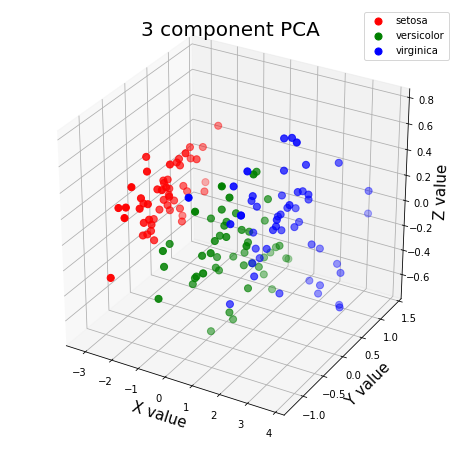

In [43]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X value', fontsize = 15)
ax.set_ylabel('Y value', fontsize = 15)
ax.set_zlabel('Z value', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca_1']
               , finalDf.loc[indicesToKeep, 'pca_2']
               , finalDf.loc[indicesToKeep, 'pca_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()